# Visualizing Data

In [8]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [9]:
matplotlib.style.use('ggplot')

In [10]:
data_clean = pd.read_csv('twitter_archive_master.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1994 non-null   int64  
 1   timestamp             1994 non-null   object 
 2   source                1994 non-null   object 
 3   text                  1994 non-null   object 
 4   expanded_urls         1994 non-null   object 
 5   rating_numerator      1994 non-null   float64
 6   rating_denominator    1994 non-null   int64  
 7   name                  1994 non-null   object 
 8   retweet_count         1994 non-null   int64  
 9   favorite_count        1994 non-null   int64  
 10  jpg_url               1994 non-null   object 
 11  dog_stage             1994 non-null   object 
 12  prediction_algorithm  1686 non-null   object 
 13  confidence_level      1994 non-null   float64
 14  dog_gender            862 non-null    object 
dtypes: float64(2), int64(

In [11]:
data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10,Biden,234,489,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,NaN
1,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10,None,89,326,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,NaN
2,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10,None,257,483,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,NaN,0.000000,NaN
3,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,None,620,833,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,NaN,0.000000,NaN
4,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,96,327,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,NaN


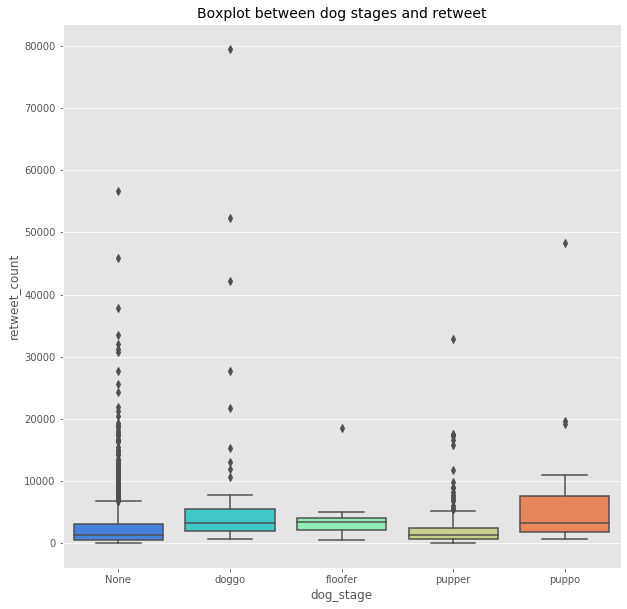

In [12]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stage',y='retweet_count',data= data_clean,palette='rainbow')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize=14);

Above plot shows that most dogs are in Puppo category, highest retweeted about none stage. But between the four of types dog highest retweeted is doggo.

<Figure size 864x864 with 0 Axes>

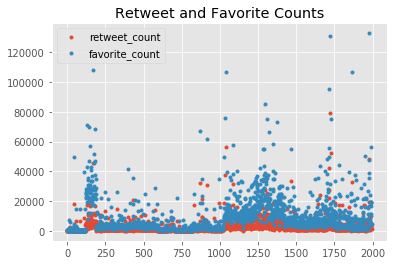

In [13]:
# plotting different realtionship between vaibles
plt.figure(figsize = (12, 12))
data_clean[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');

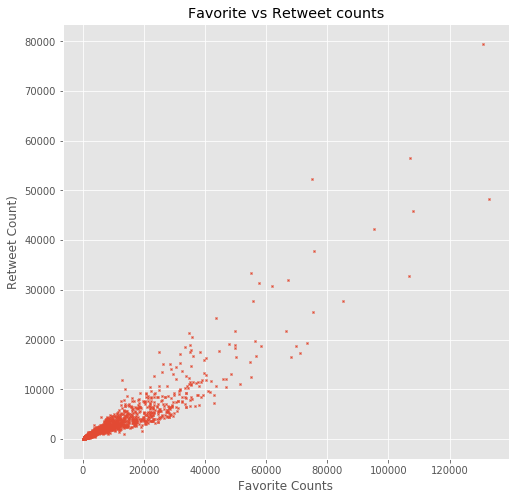

In [15]:
plt.figure(figsize = (8, 8))
plt.plot(data_clean.favorite_count, data_clean.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

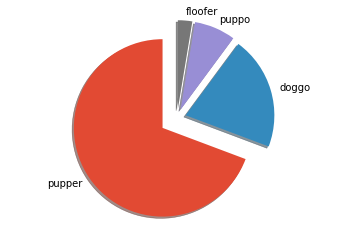

In [17]:
# Plot the data partitioned by dog stage
dog_stage_count = list(data_clean[data_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = data_clean[data_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')